In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import (KFold, train_test_split)
from matplotlib import cm
from sklearn.metrics import mean_squared_error as mse
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

## Importing and Spliting Data

In [9]:
# Import Data
url = 'https://raw.githubusercontent.com/pgardocki3/ME8813ML/master/Project/superconductor.csv'
df = pd.read_csv(url)
#df.drop('Unnamed: 0', inplace=True, axis=1) 

df.head
df=(df-df.mean())/df.std()

# Split data into train/test sets

X = df.iloc[:,0:-2]
X1 = df.iloc[:,1:11]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-0.080056,0.046732,-0.451640,-0.158846,-0.611805,0.044357,-0.003707,0.133722,-0.053037,0.378177,...,-0.752138,-0.805893,-0.711688,0.186288,0.035182,-0.837939,-0.406157,-0.838353,-0.520057,-0.158264
1,0.614729,0.174265,-0.432061,0.059367,-0.604166,0.777412,-0.015267,0.133722,0.108898,0.134898,...,-0.752138,-1.116705,-0.719437,0.664955,-0.014779,-0.033010,-0.362343,-0.426856,-0.450811,-0.245844
2,-0.080056,0.046732,-0.450967,-0.158846,-0.611644,0.044357,-0.218978,0.133722,0.093292,0.378177,...,-0.740146,-0.805893,-0.700712,0.186288,-0.062233,-0.837939,-0.376948,-0.838353,-0.503292,-0.450197
3,-0.080056,0.046732,-0.451304,-0.158846,-0.611724,0.044357,-0.103613,0.133722,0.020127,0.378177,...,-0.746142,-0.805893,-0.706208,0.186288,-0.010537,-0.837939,-0.391552,-0.838353,-0.511512,-0.362617
4,-0.080056,0.046732,-0.452314,-0.158846,-0.611966,0.044357,0.162771,0.133722,-0.199367,0.378177,...,-0.764131,-0.805893,-0.722601,0.186288,0.113625,-0.837939,-0.435366,-0.838353,-0.538165,-0.333424


### Pearson Correlation

                         mean_atomic_mass  wtd_mean_atomic_mass  \
mean_atomic_mass                 1.000000              0.815977   
wtd_mean_atomic_mass             0.815977              1.000000   
gmean_atomic_mass                0.940298              0.848242   
wtd_gmean_atomic_mass            0.745841              0.964085   
entropy_atomic_mass             -0.104000             -0.308046   
wtd_entropy_atomic_mass         -0.097609             -0.412666   
range_atomic_mass                0.125659             -0.144029   
wtd_range_atomic_mass            0.446225              0.716623   
std_atomic_mass                  0.196460             -0.060739   
wtd_std_atomic_mass              0.130675             -0.089471   

                         gmean_atomic_mass  wtd_gmean_atomic_mass  \
mean_atomic_mass                  0.940298               0.745841   
wtd_mean_atomic_mass              0.848242               0.964085   
gmean_atomic_mass                 1.000000             

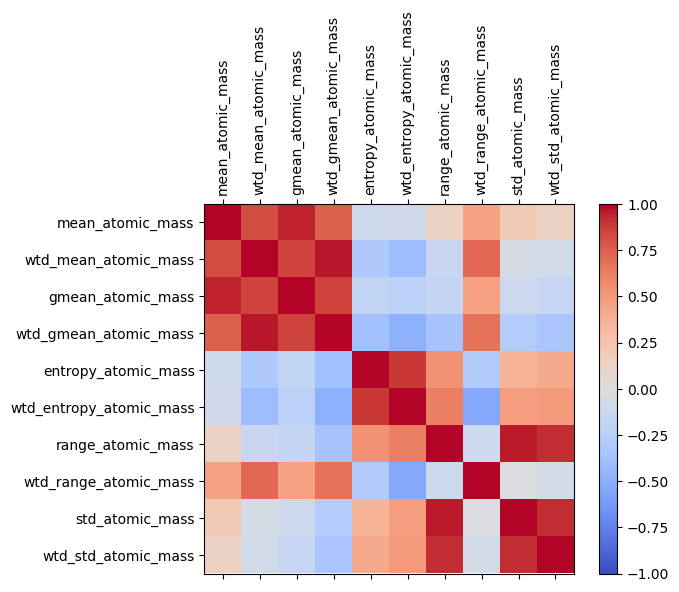

In [4]:
corr = X1.corr()
print(corr)
fig = plt.figure()
#plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X1.columns)
ax.set_yticklabels(X1.columns)
plt.show()

### K-Means

In [5]:

sse = []
minClust = 1
maxClust = 50
for i in range(minClust, maxClust):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=3000, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(15, 6))
plt.plot(range(minClust, maxClust), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.xticks(np.arange(minClust, maxClust, 1))
plt.grid()
plt.show()

KeyboardInterrupt: 

### PCA

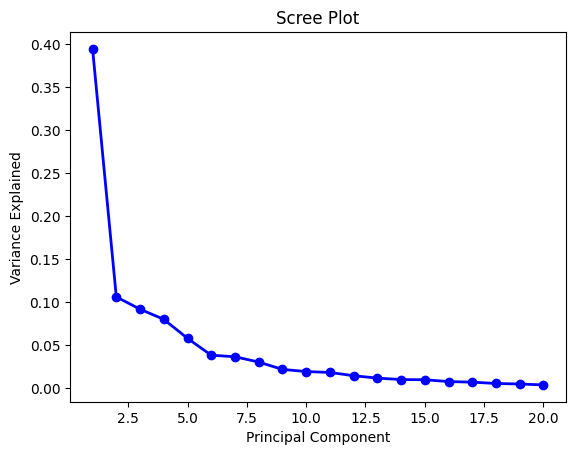

0.9701885584274357


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scalar = StandardScaler()
scaled_df = X.copy()
scaled_df = pd.DataFrame(scalar.fit_transform(scaled_df),columns=scaled_df.columns)

# Perform PCA
pca = PCA(n_components=20)
pca.fit(scaled_df)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print(sum(pca.explained_variance_ratio_))

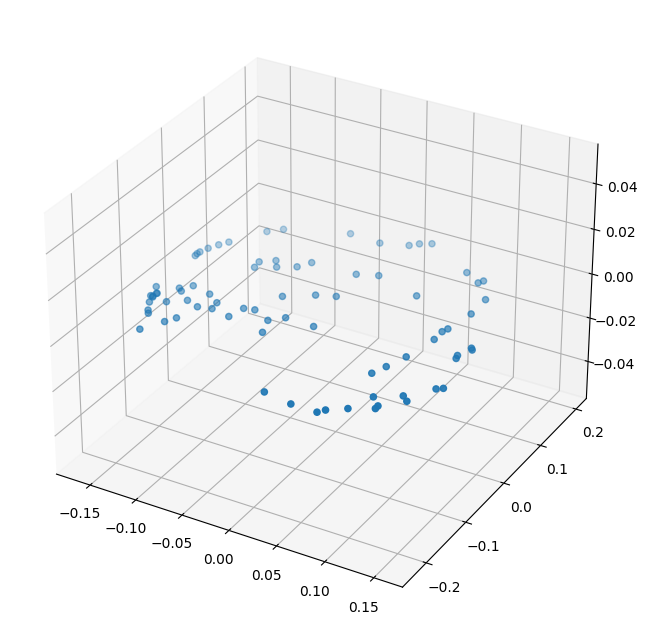

In [7]:
# Plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
#ax.scatter(X_train.iloc[:,9],X_train.iloc[:,22],y_train,label='data')
ax.scatter(pca.components_[0].reshape(1,-1),pca.components_[1].reshape(1,-1),label='data')

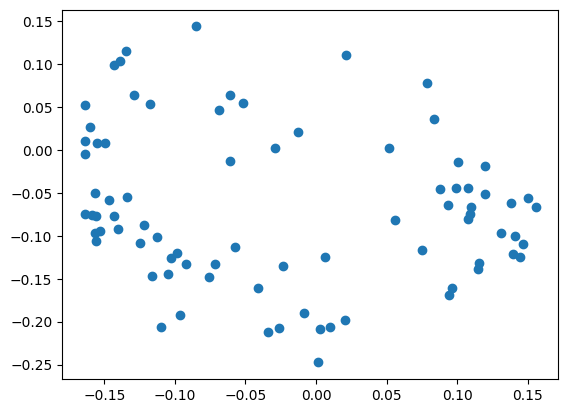

In [8]:
#plt.scatter(X_train.iloc[:,5], y_train)
plt.scatter(pca.components_[0].reshape(1,-1),pca.components_[2].reshape(1,-1),label='data')
plt.show()

In [38]:
data = pca.transform(scaled_df)
print(data.shape)

(21263, 20)


# ANN

## No PCA

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 7)                 567       
                                                                 
 dense_31 (Dense)            (None, 7)                 56        
                                                                 
 dense_32 (Dense)            (None, 1)                 8         
                                                                 
Total params: 631
Trainable params: 631
Non-trainable params: 0
_________________________________________________________________
167/167 [==============================] - 0s 766us/step
MSE 0.4085025435198579


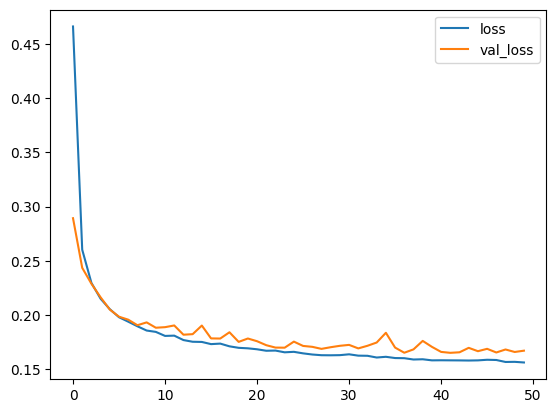

In [18]:
import tensorflow as tf



input_shape = [X_train.shape[1]]
model = tf.keras.Sequential([
    tf.keras.Input(shape=(80,)),
    tf.keras.layers.Dense(units=7, activation='relu', 
                          input_shape=input_shape),
    # tf.keras.layers.Dense(units=36, activation='relu'),
    tf.keras.layers.Dense(units=7, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

model.compile(optimizer='adam', loss='mse')

losses = model.fit(X_train, y_train,
                   validation_data=(X_test,y_test),
                   epochs=50,
                   verbose=0
                   )

y_pred = model.predict(X_test)

loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()


loss = mse(y_test,y_pred, squared=False)
print('MSE', loss)

# Plot
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],y_train,label='data')
# ax.scatter(X_test.iloc[:,0],X_test.iloc[:,1],y_pred.reshape(-1,1))
# plt.show()




## W/ PCA

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 15)                315       
                                                                 
 dense_40 (Dense)            (None, 36)                576       
                                                                 
 dense_41 (Dense)            (None, 15)                555       
                                                                 
 dense_42 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,462
Trainable params: 1,462
Non-trainable params: 0
_________________________________________________________________
167/167 [==============================] - 0s 653us/step
MSE 0.38227861148557263


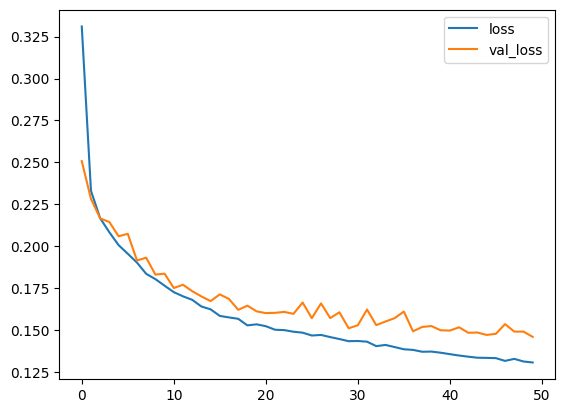

In [41]:

data = pca.transform(scaled_df)
X_train, X_test = train_test_split(data, test_size=.25, random_state=1)


input_shape = [X_train.shape[1]]
model = tf.keras.Sequential([
    tf.keras.Input(shape=(20,)),
    tf.keras.layers.Dense(units=15, activation='relu', 
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=36, activation='relu'),
    tf.keras.layers.Dense(units=15, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

model.compile(optimizer='adam', loss='mse')

losses = model.fit(X_train, y_train,
                   validation_data=(X_test,y_test),
                   epochs=50,
                   verbose=0
                   )

y_pred = model.predict(X_test)

loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()


loss = mse(y_test,y_pred, squared=False)
print('MSE', loss)